In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# 1.Incomplete

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
len(df)

10683

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# 2. Incorrect

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### From description we can see that Date_of_Journey, Dep_Time, Arrival_time is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.


    dt.day method will extract only day of that date
    dt.month method will extract only month of that date
    
    journey_day
    journey_month
    
    dep_time_hour
    dep_time_min
    
    arrival_time_hour
    arrival_time_min

In [10]:
def convert_to_date(col):
    df[col] = pd.to_datetime(df[col])

In [11]:
columns = ['Date_of_Journey','Dep_Time', 'Arrival_Time']
for i in columns:
    convert_to_date(i)

/tmp/ipykernel_80101/63766814.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col])


In [12]:
def drop_col(col):
    df.drop(col,axis = 1,inplace = True)

In [13]:
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month']= df['Date_of_Journey'].dt.month

In [14]:
df['dep_time_hour'] = df['Dep_Time'].dt.hour
df['dep_time_min'] = df['Dep_Time'].dt.minute

In [15]:
df['arrival_time_hour'] = df['Arrival_Time'].dt.hour
df['arrival_time_min'] = df['Arrival_Time'].dt.minute

In [16]:
for i in columns:
    drop_col(i)

In [17]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_time_hour,dep_time_min,arrival_time_hour,arrival_time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## 3.Inconsistent

In [18]:
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
num_col = [col for col in df.columns if df[col].dtypes != 'O']

In [19]:
for col in cat_col:
    print(f'{col} {df[col].nunique()}')
    print('\n')

Airline 12


Source 5


Destination 6


Route 128


Duration 368


Total_Stops 5


Additional_Info 10




In [20]:
for col in cat_col:
    print(f'{col} {df[col].unique()}')
    print('\n')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


Route ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'B

## Route
**we will split route column**

## Duration 
**we will split duration into hour and minute column**

## Total_Stops
**we will replace Total_Stops values as 
'non-stop':0, '2 stops':2 ,'1 stop':1, '3 stops':3 ,'4 stops':4
and then will convert into num**

In [21]:
route_list = list(df['Route'])
route_list

['BLR → DEL',
 'CCU → IXR → BBI → BLR',
 'DEL → LKO → BOM → COK',
 'CCU → NAG → BLR',
 'BLR → NAG → DEL',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'BLR → BOM → DEL',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → BLR → COK',
 'CCU → BLR',
 'MAA → CCU',
 'CCU → BOM → BLR',
 'CCU → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → PNQ → COK',
 'DEL → BOM → COK',
 'DEL → CCU → BOM → COK',
 'DEL → BOM → COK',
 'DEL → BOM → COK',
 'BLR → COK → DEL',
 'BLR → DEL',
 'BLR → DEL',
 'CCU → BOM → BLR',
 'DEL → IDR → BOM → COK',
 'DEL → LKO → COK',
 'DEL → BOM → COK',
 'BLR → DEL',
 'MAA → CCU',
 'MAA → CCU',
 'CCU → GAU → DEL → BLR',
 'BLR → DEL',
 'DEL → NAG → BOM → COK',
 'DEL → BOM → COK',
 'DEL → BOM → COK',
 'CCU → MAA → BLR',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → HYD → COK',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'BLR → DEL',
 'DEL → BOM → COK',
 'BLR → DEL',
 'BLR → DEL',
 'MAA → CCU',
 'CCU → HYD → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → COK',
 'CCU → DEL → BLR',
 'BLR → DEL',


In [22]:
split_len = ([ len(i.split('→')) for i in df['Route'] ])

In [23]:
# split_len = list(map(lambda i: len(i.split('→')) ,route_list))

In [24]:
max(split_len)

6

max no. of root is 6 so we will create 6 columns

In [25]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
df["Route 1"] = df['Route'].str.split('→').str[0]
df["Route 2"] = df['Route'].str.split('→').str[1]
df["Route 3"] = df['Route'].str.split('→').str[2]
df["Route 4"] = df['Route'].str.split('→').str[3]
df["Route 5"] = df['Route'].str.split('→').str[4]
df["Route 6"] = df['Route'].str.split('→').str[5]

In [27]:
Routes = ["Route 1","Route 2","Route 3","Route 4","Route 5" , "Route 6"]

In [28]:
for i in Routes:
    print(f'{i} {df[i].value_counts()}')
    print('\n')

Route 1 DEL     4536
CCU     2871
BLR     2197
BOM      697
MAA      381
Name: Route 1, dtype: int64


Route 2  BOM     3867
 DEL     1552
 BLR      724
 DEL      663
 HYD      621
 HYD      565
 CCU      381
 AMD      263
 JAI      260
 MAA      259
 BLR      236
 COK      213
 BBI      114
 IDR      106
 GAU       88
 NAG       83
 CCU       75
 GOI       72
 PNQ       66
 LKO       61
 BHO       57
 IXR       52
 JDH       41
 ATQ       40
 BDQ       38
 IXB       21
 UDR       19
 RPR       19
 TRV       18
 COK       16
 VGA       15
 IXC       13
 IXU       12
 VNS       11
 PAT       10
 KNU       10
 GWL        8
 DED        3
 HBX        3
 STV        2
 JLR        1
 VTZ        1
 NDC        1
 IXZ        1
 IXA        1
Name: Route 2, dtype: int64


Route 3  COK     3185
 BLR     1834
 BOM     1088
 DEL      562
 DEL      120
 MAA       85
 COK       72
 HYD       44
 AMD       35
 NAG       27
 GOI       16
 IDR       15
 BBI       14
 VGA       14
 HYD       14
 BHO       

Route 6 has only 1 value so we will remove this

In [29]:
rem_col = ['Route 6' , 'Route' , 'Additional_Info']

def drop_col(col):
    df.drop(col , axis = 1 , inplace =True)

In [30]:
for i in rem_col:
    drop_col(i)

In [31]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'dep_time_hour', 'dep_time_min',
       'arrival_time_hour', 'arrival_time_min', 'Route 1', 'Route 2',
       'Route 3', 'Route 4', 'Route 5'],
      dtype='object')

In [32]:
Routes

['Route 1', 'Route 2', 'Route 3', 'Route 4', 'Route 5', 'Route 6']

In [33]:
Routes = ['Route 1', 'Route 2', 'Route 3', 'Route 4', 'Route 5']

In [34]:

for i in Routes:
    print(f'{i} {df[i].unique()}')
    print('\n')

Route 1 ['BLR ' 'CCU ' 'DEL ' 'MAA ' 'BOM ']


Route 2 [' DEL' ' IXR ' ' LKO ' ' NAG ' ' BLR' ' BOM ' ' BLR ' ' CCU' ' AMD '
 ' PNQ ' ' CCU ' ' COK ' ' IDR ' ' GAU ' ' MAA ' ' HYD ' ' COK' ' DEL '
 ' HYD' ' BHO ' ' JAI ' ' ATQ ' ' JDH ' ' BBI ' ' GOI ' ' BDQ ' ' TRV '
 ' IXU ' ' IXB ' ' UDR ' ' RPR ' ' DED ' ' VGA ' ' VNS ' ' IXC ' ' PAT '
 ' JLR ' ' KNU ' ' GWL ' ' VTZ ' ' NDC ' ' IXZ ' ' HBX ' ' IXA ' ' STV ']


Route 3 [nan ' BBI ' ' BOM ' ' BLR' ' DEL' ' COK' ' DEL ' ' AMD ' ' HYD' ' JDH '
 ' MAA ' ' COK ' ' GOI ' ' NAG ' ' GAU ' ' BHO ' ' IXR ' ' IDR ' ' ISK '
 ' HYD ' ' VGA ' ' PNQ ' ' JAI ' ' TRV ' ' HBX ' ' IMF ' ' CCU ' ' UDR '
 ' VTZ ' ' IXC ']


Route 4 [nan ' BLR' ' COK' ' DEL' ' BOM ' ' HYD' ' DEL ' ' HYD ' ' GWL ' ' TRV '
 ' BBI ' ' BHO ' ' AMD ' ' NAG ']


Route 5 [nan ' COK' ' BLR' ' DEL' ' HYD' ' VGA ']




**it's containing trailing space so let's remove**

In [35]:
df['Route 1'].apply(lambda x: x.replace(" ",""))

0        BLR
1        CCU
2        DEL
3        CCU
4        BLR
        ... 
10678    CCU
10679    CCU
10680    BLR
10681    BLR
10682    DEL
Name: Route 1, Length: 10682, dtype: object

we can run a loop for routes but it will throw an error in route 3 because in route 3 there are some nan values so lets fill those values with "none"

In [36]:
df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Duration                 0
Total_Stops              0
Price                    0
journey_day              0
journey_month            0
dep_time_hour            0
dep_time_min             0
arrival_time_hour        0
arrival_time_min         0
Route 1                  0
Route 2                  0
Route 3               3491
Route 4               9116
Route 5              10636
dtype: int64

In [37]:
df.fillna('None',inplace = True)

In [38]:
for i in Routes:
    df[i] = df[i].apply(lambda x: x.replace(" ",""))

In [39]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,dep_time_hour,dep_time_min,arrival_time_hour,arrival_time_min,Route 1,Route 2,Route 3,Route 4,Route 5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,19,55,22,25,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,8,20,11,20,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,3,1,11,30,14,10,BLR,DEL,None,None,None


### Duration

In [40]:
df['Duration'].str.split()

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10682, dtype: object

*here is a problem if we directly split this then if a row has only hour then it will goes to the minute column and if a row has only minute then it will come to the ist column that is hour column*

*so we will apply a approach that is if a row has only hr then add 0m and if a row has only min then add 0hr so the columns will be balanced*

In [41]:
duration = list(df['Duration'])

In [42]:
duration[1].split()

['7h', '25m']

In [43]:
len(duration[1].split())

2

In [44]:
duration[2]

'19h'

In [45]:
len(duration[2].split())

1

from above obs. it is clear if the row has hr and m then the length will be two other wise 1

don't forget to add the space of '0m ' and ' 0h'

In [46]:
for i in range(len(duration)):
    if len(duration[i].split()) == 2:
        pass
    else:
        # if there is hr then add minute
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            #if there is minute then add hr
            duration[i] = '0h ' + duration[i] 

In [47]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [48]:
df['Duration'] = duration

split into minute and hour

In [49]:
'19h 20m'.split()[0][0:-1]

'19'

In [50]:
'19h 20m'.split()[1][0:-1]

'20'

In [51]:
def hour(x):
    return x.split()[0][0:-1]

In [52]:
df['Duration_hours'] = df['Duration'].apply(hour)

In [53]:
def minute(x):
    return x.split()[1][0:-1]

In [54]:
df['Duration_mins'] = df['Duration'].apply(minute)

lets convert these into int and drop the duration column

In [55]:
for i in ['Duration_hours' , 'Duration_mins']:
    df[i] = pd.to_numeric(df[i])

In [56]:
df.dtypes

Airline              object
Source               object
Destination          object
Duration             object
Total_Stops          object
Price                 int64
journey_day           int64
journey_month         int64
dep_time_hour         int64
dep_time_min          int64
arrival_time_hour     int64
arrival_time_min      int64
Route 1              object
Route 2              object
Route 3              object
Route 4              object
Route 5              object
Duration_hours        int64
Duration_mins         int64
dtype: object

In [57]:
drop_col("Duration")

*Total_Stops*

In [58]:
df['Total_Stops'].replace(to_replace = {'non-stop':'0', '2 stops':'2' ,'1 stop':'1', '3 stops':'3' ,'4 stops':'4'},inplace = True)

In [59]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: object

In [60]:
df['Total_Stops'] = pd.to_numeric(df['Total_Stops'])

## 4. out of range (outlier)

In [61]:
df.describe()

,Total_Stops,Price,journey_day,journey_month,dep_time_hour,dep_time_min,arrival_time_hour,arrival_time_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


looks like price is out of range

<Axes: ylabel='Price'>

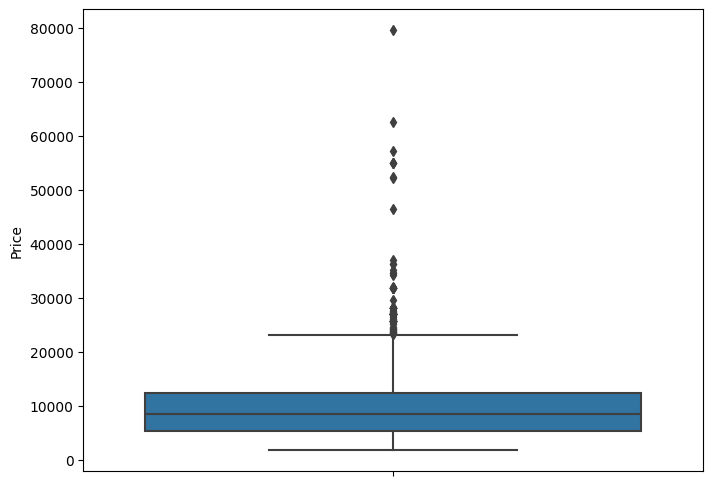

In [62]:
plt.figure(figsize = (8,6))
sns.boxplot(y = df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

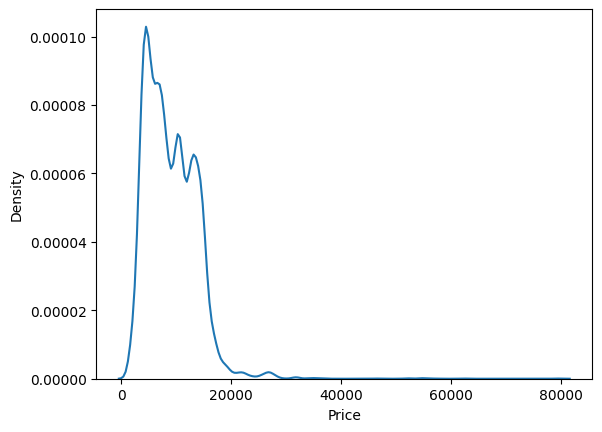

In [63]:
sns.kdeplot(df['Price'])

since it is non-normalised.
we will use iqr metod

In [64]:
def q1(col):
    q1 = df[col].quantile(0.25)
    return q1

In [65]:
def q3(col):
    q3 = df[col].quantile(0.75)
    return q3

In [66]:
q1 = q1('Price')
q1

5277.0

In [67]:
q3 = q3('Price')
q3

12373.0

In [68]:
iqr = q3-q1

In [69]:
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
print(f'lower limit is {lower_limit}\nupper limit is {upper_limit}')

lower limit is -5367.0
upper limit is 23017.0


In [70]:
print(f'lower limit is {lower_limit}\nupper limit is {upper_limit}')

lower limit is -5367.0
upper limit is 23017.0


In [71]:
len(df[df["Price"]>23017])

94

we have 94 outliers out of 10,000 rows in price

In [72]:
data_cleaned = df[df["Price"]<23017]

<Axes: ylabel='Price'>

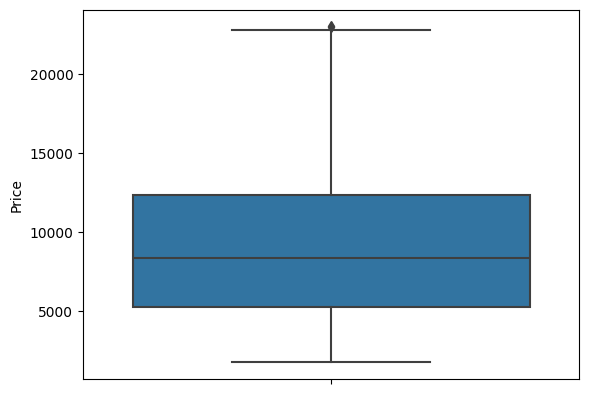

In [73]:
sns.boxplot(y = "Price" , data = data_cleaned)

In [76]:
df['Price'].quantile(0.25)
df['Price'].quantile(0.75)

12373.0

In [74]:
q1 = q1('Price')
q3 = q3('Price')
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
print(f'lower limit is {lower_limit}\nupper limit is {upper_limit}')

TypeError: 'numpy.float64' object is not callable

<AxesSubplot:xlabel='Price', ylabel='Density'>

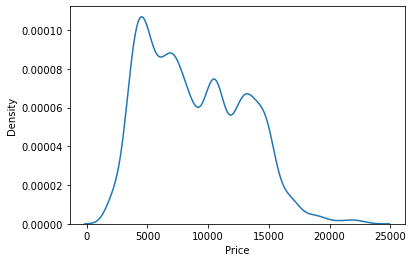

In [80]:
sns.kdeplot(data_cleaned['Price'])

Now there is no outliers

In [81]:
len(df)

10682

In [82]:
len(data_cleaned)

10588

In [83]:
data_cleaned.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_time_hour,dep_time_min,arrival_time_hour,arrival_time_min,Route 1,Route 2,Route 3,Route 4,Route 5,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,DEL,LKO,BOM,COK,None,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,BLR,NAG,DEL,None,None,4,45


In [84]:
data_cleaned.to_csv('data_cleaned.csv',index = False)